<a href="https://colab.research.google.com/github/chrisnjw/Chris_Portfolio_DS/blob/master/Linear_Regression_PlayGround.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x798f940d5360>)

Creating a Pandas dataframe using the downloaded file, to view and analyze the data

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking the datatype for each column

In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Default setting for plot

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')

fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

In [15]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [17]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Regions Sex')

fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [19]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title="BMI vs. Charges")

fig.update_traces(marker_size=5)
fig.show()

In [20]:
fig = px.scatter(medical_df,
                 x='age',
                 y='region',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title="Age vs. Region")

fig.update_traces(marker_size=5)
fig.show()

Checking the correlations

In [21]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [22]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [23]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

Covnert categorical data into numerical data in order to compute the correlation

In [24]:
smoker_values = {'no': 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [25]:
medical_df.corr()

<ipython-input-25-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-26-32f619adbb17>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



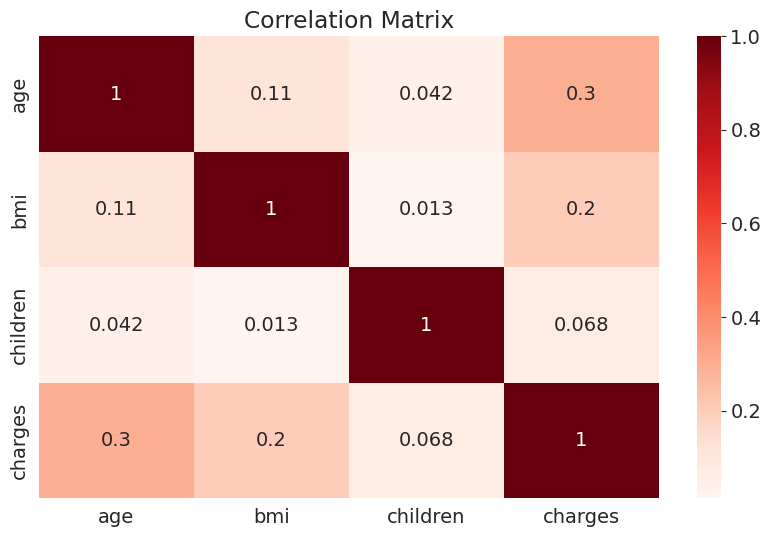

In [26]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

Linear Regression using a Single Feature

In [27]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

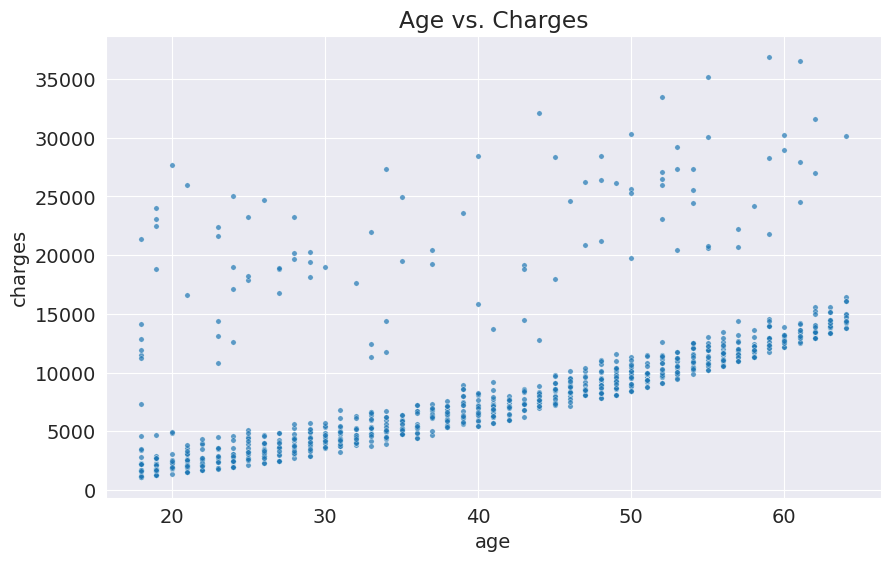

In [28]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [29]:
def estimate_charges(age, w, b):
  return w * age + b

In [30]:
w = 50
b = 100

In [31]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [32]:
estimate_charges(ages, w, b)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [33]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

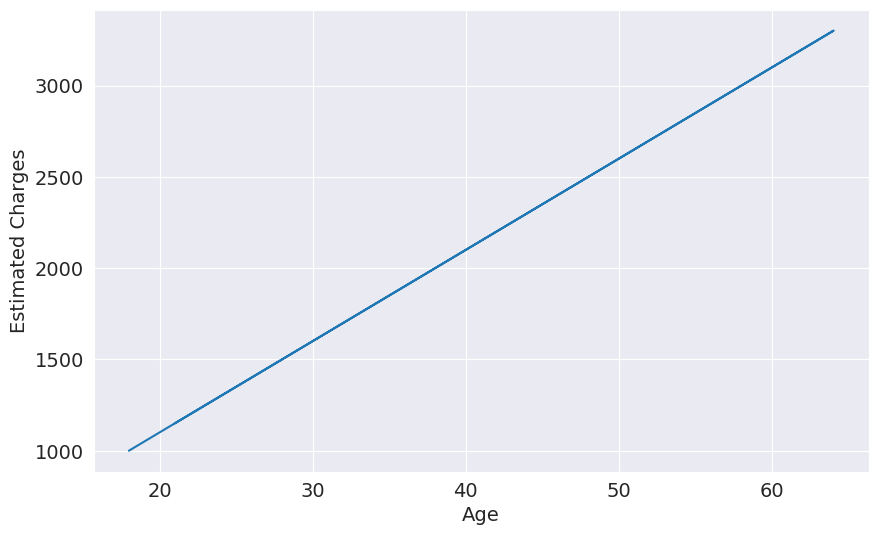

In [34]:
plt.plot(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

Plot the predicted data over actual data

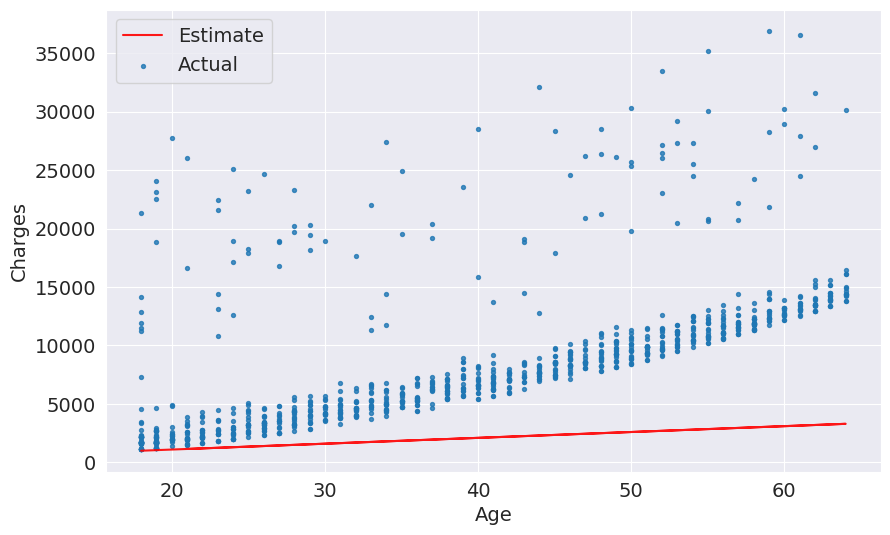

In [35]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [36]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Estimate', 'Actual']);

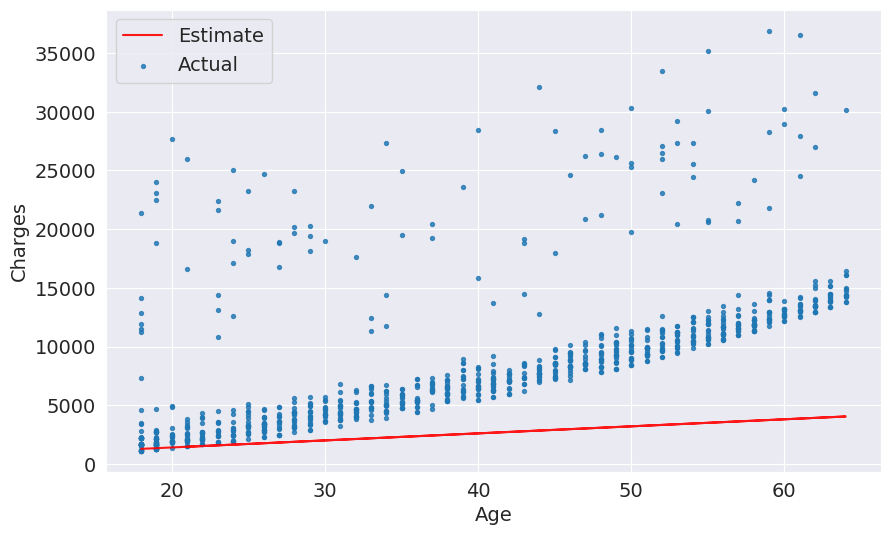

In [37]:
try_parameters(60, 200)

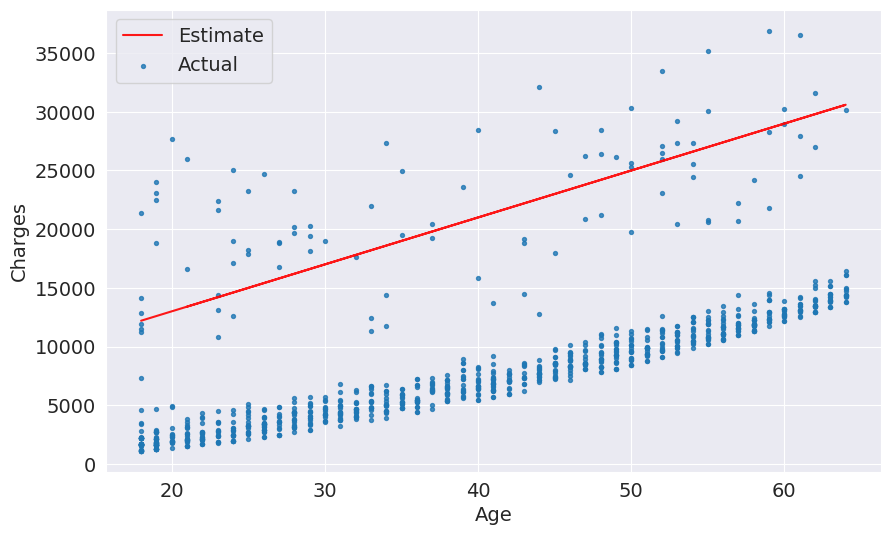

In [38]:
try_parameters(400, 5000)

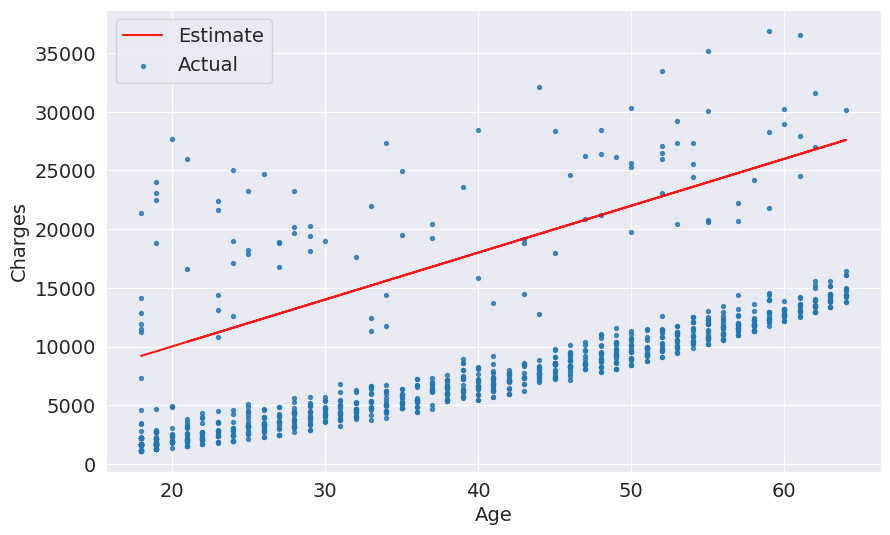

In [39]:
try_parameters(400, 2000)

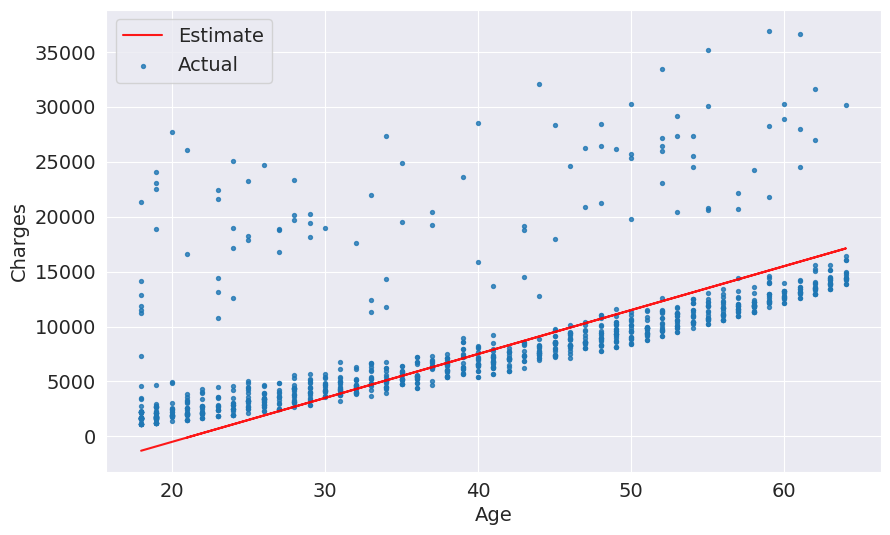

In [40]:
try_parameters(400, -8500)

In [41]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [43]:
import numpy as np

In [44]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [45]:
w = 50
b = 100

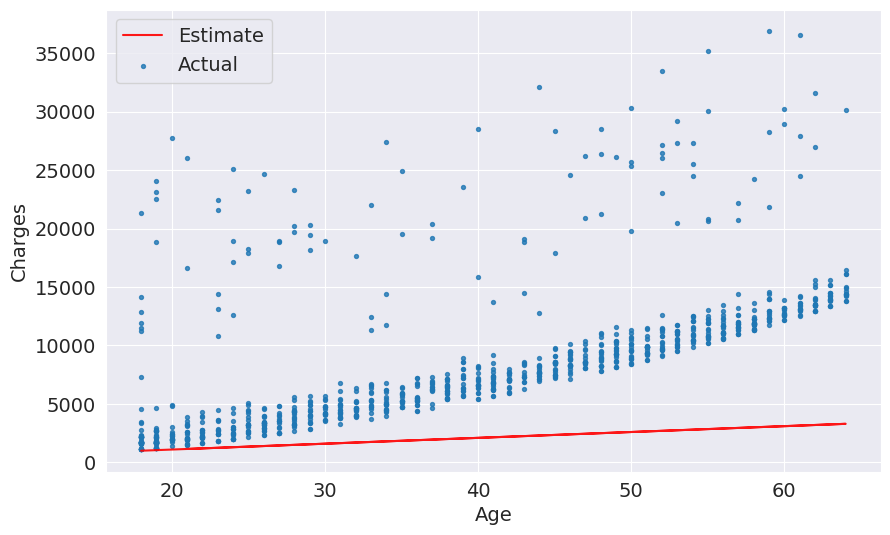

In [46]:
try_parameters(w, b)

In [47]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [48]:
rmse(targets, predicted)

8461.949562575493

In [49]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual']);

  loss = rmse(target, predictions)
  print("RMSE Loss: ", loss)

RMSE Loss:  4991.993804156943


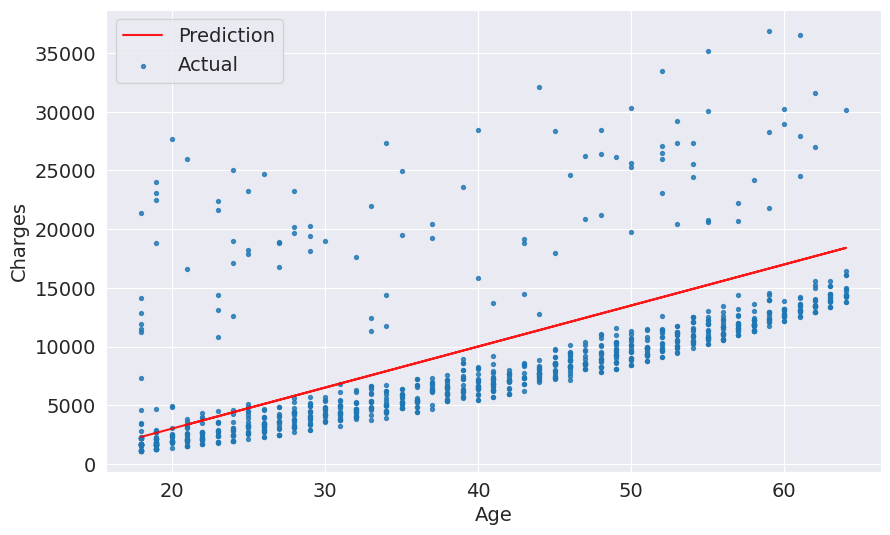

In [50]:
try_parameters(350, -4000)

In [51]:
from sklearn.linear_model import LinearRegression

# Creating a new model object

In [52]:
model = LinearRegression()

In [53]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('input.shape : ', inputs.shape)
print('target.shape : ', targets.shape)

input.shape :  (1064, 1)
target.shape :  (1064,)


In [54]:
type(inputs)

pandas.core.frame.DataFrame

In [55]:
model.fit(inputs, targets)

LinearRegression()

In [56]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [57]:
predictions = model.predict(inputs)

In [58]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [59]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [60]:
rmse(targets, predictions)

4662.505766636395

In [61]:
# w
model.coef_

array([267.24891283])

In [62]:
# b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


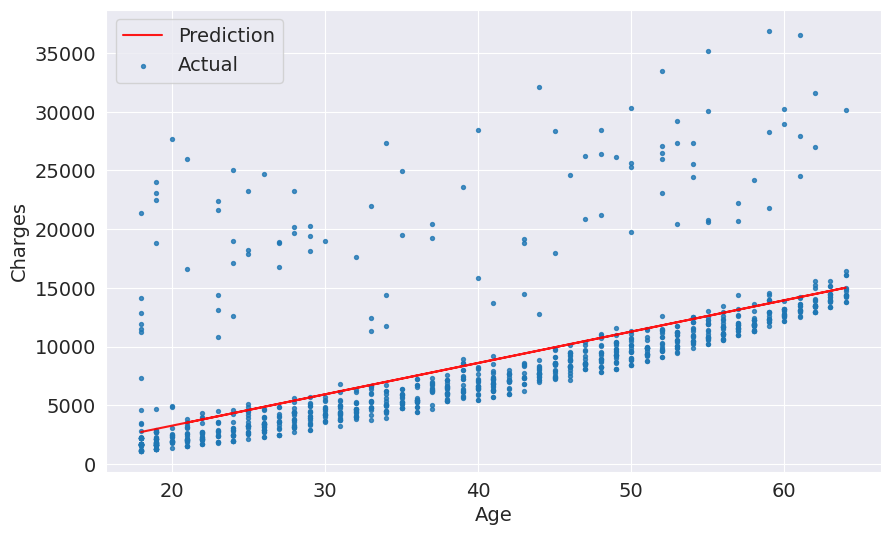

In [63]:
try_parameters(model.coef_, model.intercept_)

## Linear Regression using Multiple Features

In [64]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


In [65]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [66]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [67]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [68]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children vs. Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [69]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


In [70]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

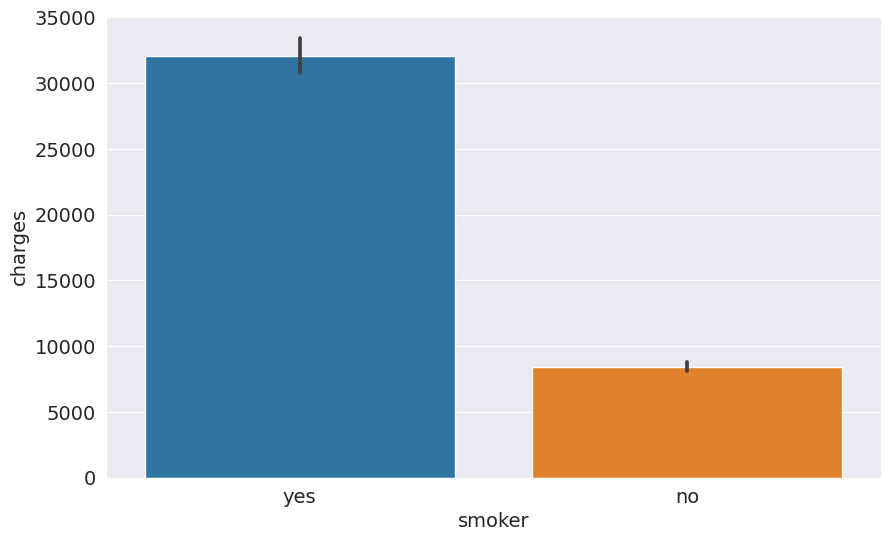

In [71]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [72]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [73]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [74]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [75]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

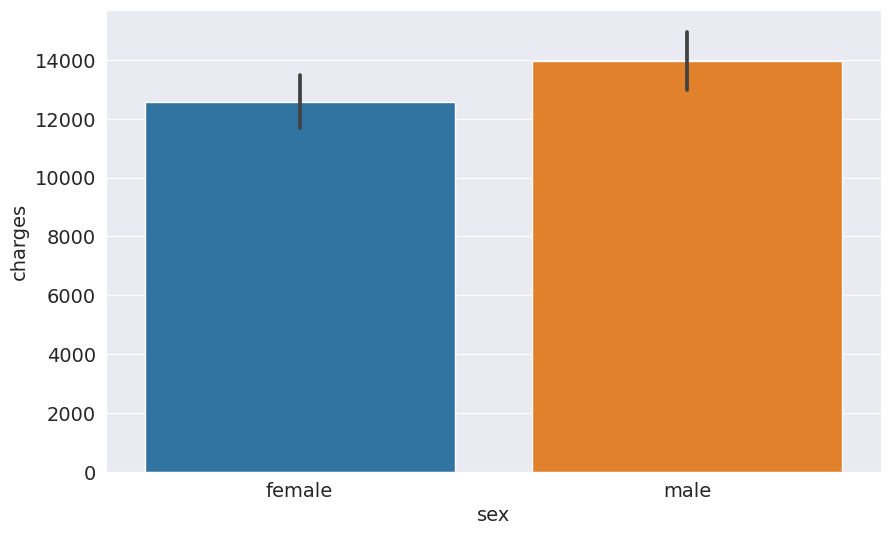

In [76]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [77]:
sex_codes = {'female':0, 'male':1}

In [78]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [79]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [80]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


## One hot Encoding

In [81]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [82]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [83]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [84]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [85]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


Feature Scaling

In [86]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [89]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [90]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [91]:
# Scaling the data
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [93]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [94]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [95]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})

weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


New Customer Test

In [96]:
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]]

In [97]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [98]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1, 0, 0, 1, 0, 0.]])

array([29875.81463371])

# Creating a test set

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
input_train, input_test, target_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [103]:
# Create and train the model
model = LinearRegression().fit(input_train, target_train)

# Generate predictions
prediction_test = model.predict(input_test)

# Compute loss to evaluate model
loss = rmse(targets_test, prediction_test)
print('Test Loss:', loss)

Test Loss: 5566.261567740065


# Compare with the training loss

In [105]:
# Generate predictions
predictions_train = model.predict(input_train)

# Compute loss to evaluate the model
loss = rmse(target_train, predictions_train)
print('Training Loss: ', loss)

Training Loss:  6094.763271641131
